ハイパーパラメーターのチューニング

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
# データの読込
df = pd.read_csv('input/data14.csv')

# 特徴行列 X と目的変数 y へ分離
X = df[['x0', 'x1']].values
y = df['y'].values

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

tree = DecisionTreeClassifier(max_depth=4)
result = cross_validate(
estimator=tree,X=X,y=y,cv=3,return_train_score=True)

result

{'fit_time': array([0.0008955 , 0.00043082, 0.00038767]),
 'score_time': array([0.00053811, 0.00026655, 0.00025916]),
 'test_score': array([0.71666667, 0.61666667, 0.63333333]),
 'train_score': array([1.        , 0.875     , 0.88333333])}

In [6]:
def check_tree(X,y,max_depth,cv):
    import numpy as np
    tree = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    result = cross_validate(
    estimator=tree,X=X,y=y,cv=cv,return_train_score=True)
    return tree,np.mean(result['train_score']),np.mean(result['test_score'])

In [7]:
max_depths = [1,2,3,4,5,6,7,8,9]
score_trains = []
score_tests = []
for max_depth in max_depths:
    _,score_train,score_test = check_tree(X,y,max_depth,cv=3)
    print('max_depth',max_depth,'train',score_train,'test',score_test)
    score_trains.append(score_train)
    score_tests.append(score_test)

max_depth 1 train 0.7305555555555556 test 0.5444444444444444
max_depth 2 train 0.8111111111111112 test 0.6166666666666667
max_depth 3 train 0.8777777777777778 test 0.6555555555555556
max_depth 4 train 0.9194444444444444 test 0.6555555555555556
max_depth 5 train 0.9305555555555555 test 0.7333333333333334
max_depth 6 train 0.9527777777777778 test 0.6944444444444443
max_depth 7 train 0.9722222222222223 test 0.7055555555555556
max_depth 8 train 0.9833333333333334 test 0.7055555555555556
max_depth 9 train 0.9944444444444445 test 0.7000000000000001


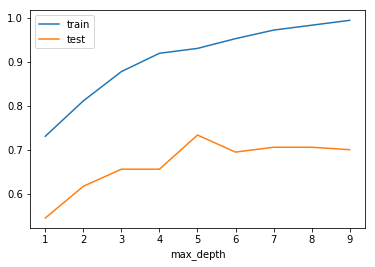

In [8]:
plt.xlabel('max_depth')
plt.plot(max_depths,score_trains,label='train')
plt.plot(max_depths,score_tests,label='test')
plt.legend();